# Fuente:
### Kaggle: [Resultados de estudiantes](https://www.kaggle.com/datasets/lainguyn123/student-performance-factors)

#### Significado de cada Variable:
- Hours_Studied: Number of hours spent studying per week
- Attendance: Percentage of classes attended
- Parental_Involvement: Level of parental involvement in the student's education (Low, Medium, High).
- Access_to_Resources: Availability of educational resources (Low, Medium, High).
- Extracurricular_Activities: Participation in extracurricular activities (Yes, No).
- Sleep_Hours: Average number of hours of sleep per night.
- Previous_Scores: Scores from previous exams.
- Motivation_Level: Student's level of motivation (Low, Medium, High).
- Internet_Access: Availability of internet access (Yes, No).
- Tutoring_Sessions: Number of tutoring sessions attended per month.
- Family_Income: Family income level (Low, Medium, High).
- Teacher_Quality: Quality of the teachers (Low, Medium, High).
- School_Type: Type of school attended (Public, Private).
- Peer_Influence: Influence of peers on academic performance (Positive, Neutral, Negative).
- Physical_Activity: Average number of hours of physical activity per week.
- Learning_Disabilities: Presence of learning disabilities (Yes, No).
- Parental_Education_Level: Highest education level of parents (High School, College, Postgraduate).
- Distance_from_Home: Distance from home to school (Near, Moderate, Far).
- Gender: Gender of the student (Male, Female).
- <span style="display: inline-block; vertical-align: bottom;">Exam_Score: Final exam score.</span>
<span style="display: inline-block; vertical-align: bottom; font-size: 0.6em;">(Target)</span>

## Importación de librerías

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Lectura del Dataset y primer vistazo

In [30]:
df = pd.read_csv(r'C:\Users\plaza\Desktop\Documentos_Clase\ONLINE_DS_THEBRIDGE_Alejandro_Plaza\Proyecto_ML\data\raw\StudentPerformanceFactors.csv')

In [31]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

Observamos que hay 3 variables con resultados nulos, más adelante veremos si hay que modificarlos o directamente lo dejamos así

#### Vamos a crear nuevas variables a partir de las variables categóricas que hay

In [33]:
df['Parental_Involvement'].value_counts()

Parental_Involvement
Medium    3362
High      1908
Low       1337
Name: count, dtype: int64

In [123]:
Parental_Involvement = pd.get_dummies(data = df['Parental_Involvement'], prefix = 'PI').astype(int)

In [124]:
df = pd.concat([df, Parental_Involvement], axis = 1)

In [125]:
Access_to_Resources	= pd.get_dummies(data = df['Access_to_Resources'], prefix = 'AtR').astype(int)

In [126]:
df = pd.concat([df, Access_to_Resources], axis = 1)

### La mayoría son desechadas más adelante debido a la bajísima correlación que tienen

In [127]:
# df['Extracurricular_Activities'] = (df['Extracurricular_Activities'] == 'Yes').astype(int)

In [128]:
# Motivation_Level = pd.get_dummies(data = df['Motivation_Level']).astype(int)

In [129]:
# df = pd.concat([df, Motivation_Level], axis = 1)

In [130]:
# df['Internet_Access'] = (df['Internet_Access'] == 'Yes').astype(int)

In [131]:
# Teacher_Quality = pd.get_dummies(data = df['Teacher_Quality'], prefix = 'TQ').astype(int)

In [132]:
# df = pd.concat([df, Teacher_Quality], axis = 1)

In [133]:
# df['Private_School'] = (df['School_Type'] == 'Private').astype(int)

In [134]:
# Peer_Influence = pd.get_dummies(data = df['Peer_Influence'], prefix = 'PeerI').astype(int)

In [135]:
# df = pd.concat([df, Peer_Influence], axis = 1)

In [136]:
# df['Learning_Disabilities'] = (df['Learning_Disabilities'] == 'Yes').astype(int)

In [137]:
# Parental_Education_Level = pd.get_dummies(data = df['Parental_Education_Level'], prefix = 'ParEd').astype(int)

In [138]:
# df = pd.concat([df, Parental_Education_Level], axis = 1)

In [139]:
# df['Female'] = (df['Gender'] == 'Female').astype(int)

In [140]:
# Distance_from_Home = pd.get_dummies(data = df['Distance_from_Home'], prefix = 'DfH').astype(int)

In [141]:
# df = pd.concat([df, Distance_from_Home], axis = 1)

### Comprobamos cuánta correlación tiene cada variable numérica con el target 'Exam_Score'

In [142]:
df.corr(numeric_only = True)

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score,PI_High,PI_Low,PI_Medium,AtR_High,AtR_Low,AtR_Medium
Hours_Studied,1.000000,-0.009908,0.010977,0.024846,-0.014282,0.004624,0.445455,-0.012819,0.013395,0.000856,0.002248,0.012119,-0.011730
Attendance,-0.009908,1.000000,-0.015918,-0.020186,0.014324,-0.022435,0.581072,-0.001619,0.014296,-0.010021,-0.006398,0.012798,-0.004356
Sleep_Hours,0.010977,-0.015918,1.000000,-0.021750,-0.012216,-0.000378,-0.017022,-0.004879,0.008250,-0.002207,-0.004368,0.020371,-0.012259
Previous_Scores,0.024846,-0.020186,-0.021750,1.000000,-0.013122,-0.011274,0.175079,-0.014023,0.020662,-0.003893,0.014023,-0.025673,0.007651
Tutoring_Sessions,-0.014282,0.014324,-0.012216,-0.013122,1.000000,0.017733,0.156525,0.003796,0.007929,-0.009813,-0.012923,0.005779,0.007220
Physical_Activity,0.004624,-0.022435,-0.000378,-0.011274,0.017733,1.000000,0.027824,-0.007838,0.000477,0.006722,-0.029187,-0.015991,0.039485
Exam_Score,0.445455,0.581072,-0.017022,0.175079,0.156525,0.027824,1.000000,0.140396,-0.113602,-0.035978,0.143766,-0.132155,-0.026158
PI_High,-0.012819,-0.001619,-0.004879,-0.014023,0.003796,-0.007838,0.140396,1.000000,-0.320957,-0.648602,-0.001714,0.028310,-0.021024
PI_Low,0.013395,0.014296,0.008250,0.020662,0.007929,0.000477,-0.113602,-0.320957,1.000000,-0.512687,0.011798,-0.032760,0.015343
PI_Medium,0.000856,-0.010021,-0.002207,-0.003893,-0.009813,0.006722,-0.035978,-0.648602,-0.512687,1.000000,-0.007928,0.000663,0.006729


Variables a desechar: 'Sleep_Hours', 'Physical_Activity', 'PI_Medium', 'AtR_Medium'

<Axes: >

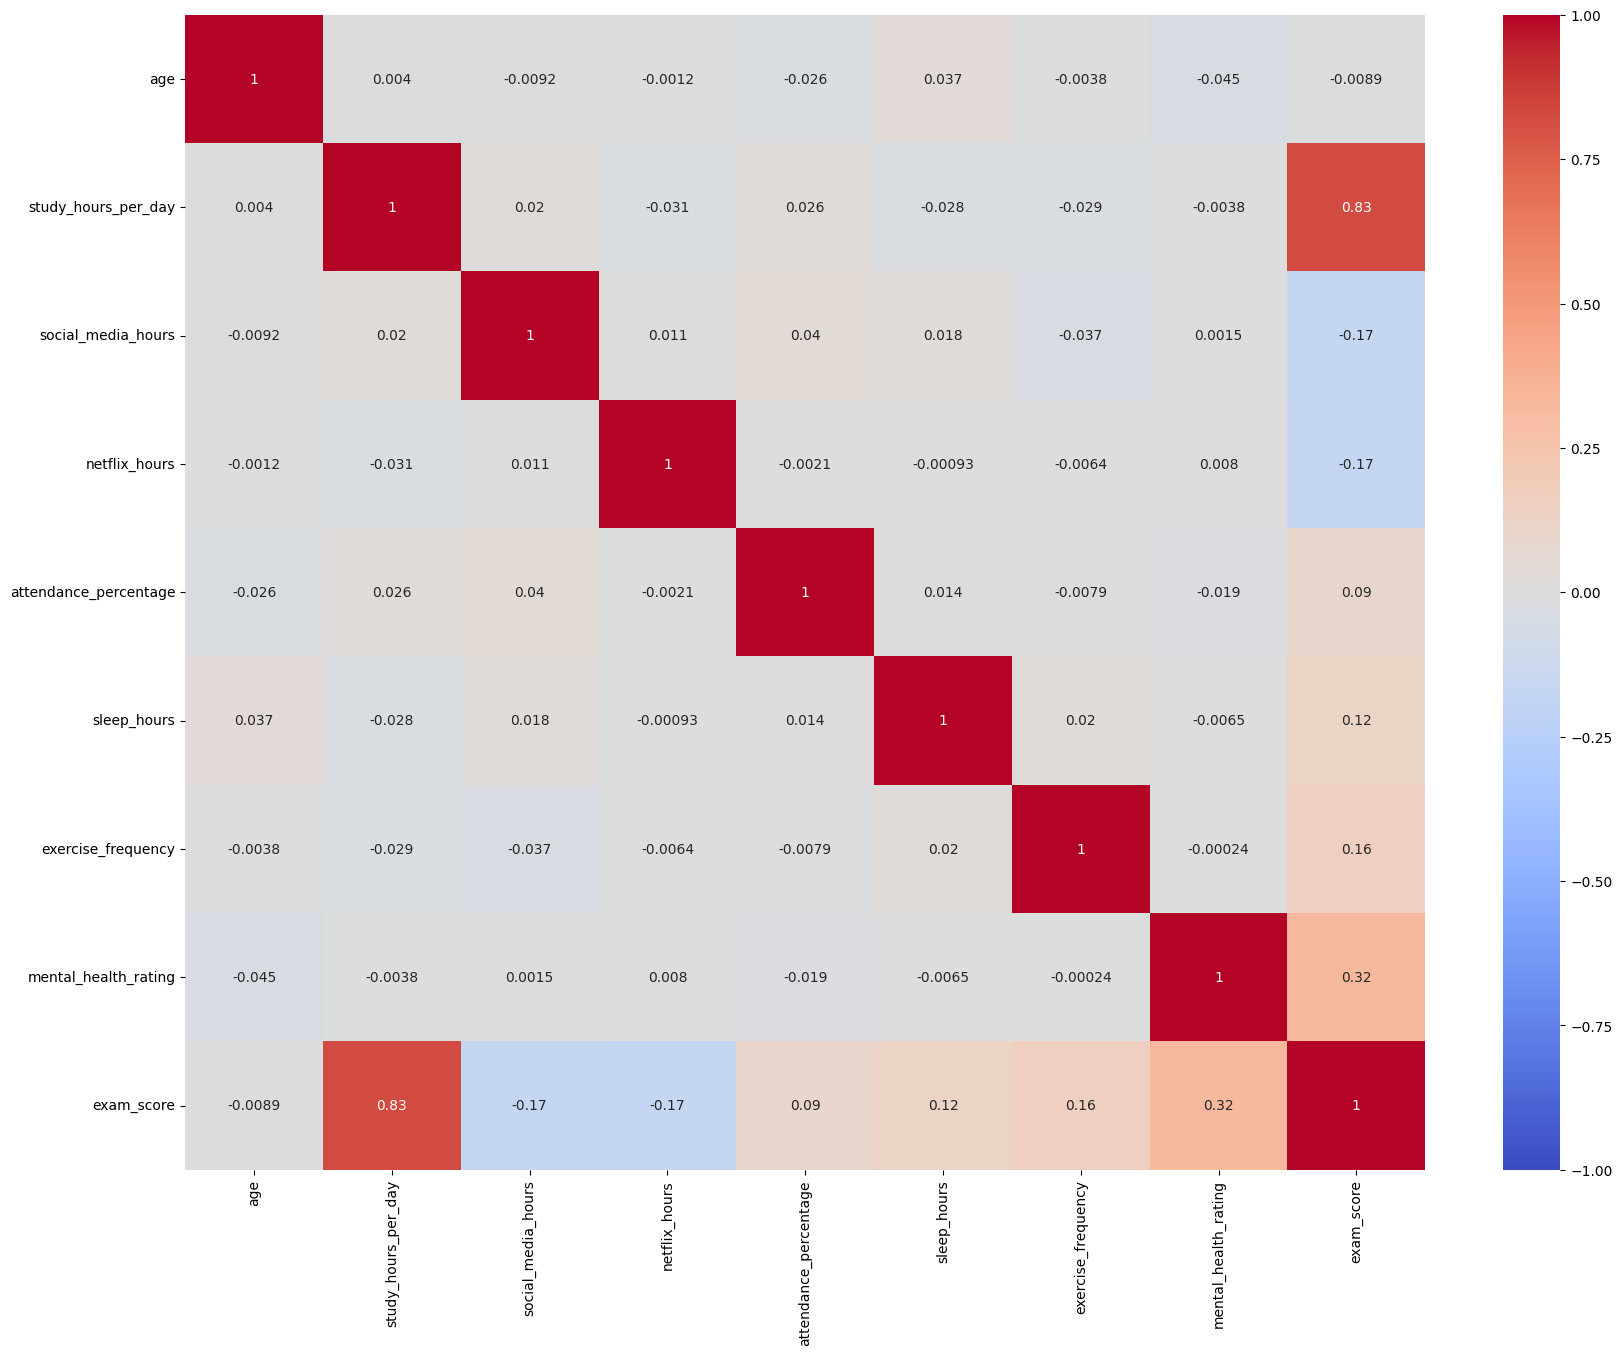

In [19]:
plt.figure(figsize = (20 , 15))
sns.heatmap(data = df.corr(numeric_only = True), cmap = 'coolwarm', vmin = -1, vmax = 1, annot = True)

#### Guardamos este dataset solo con variables numéricas para usarlo en la limpieza del mismo
(lógicamente al haber creado variables numéricas a partir de variables categóricas y comprobar su baja relación ya hemos limpiado bastante el dataset, pero no suficiente)

In [146]:
df.select_dtypes('number').to_csv(r'C:\Users\plaza\Desktop\Documentos_Clase\ONLINE_DS_THEBRIDGE_Alejandro_Plaza\Proyecto_ML\data\raw\estudiantes_solo_num_sin_limpieza.csv', index = False)